In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)

In [4]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [7]:
w

array([0., 0.])

In [5]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [6]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.2413


In [1]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.03025

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
print(errors)
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
print(f'Количество итераций {iter_num}')


NameError: name 'w' is not defined

Визуализация изменения весов при дефолтном шаге eta = 0.01

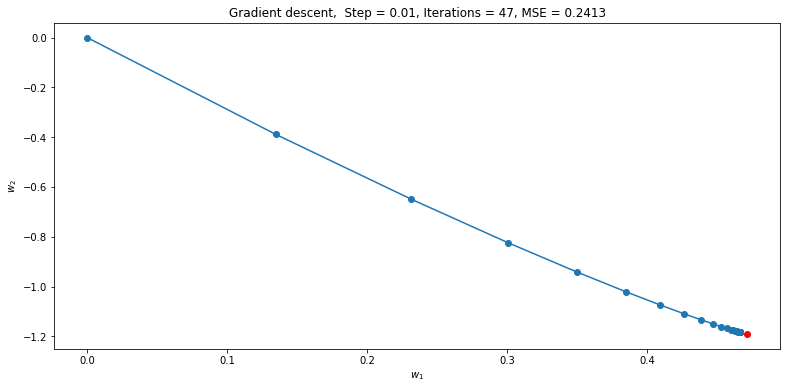

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
# Шаг eta = 0.01 (default)
# В случае использования градиентного спуска функционал ошибки составляет 0.2413
# Количество итераций 47
plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

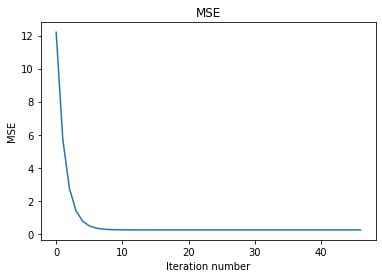

In [ ]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.05

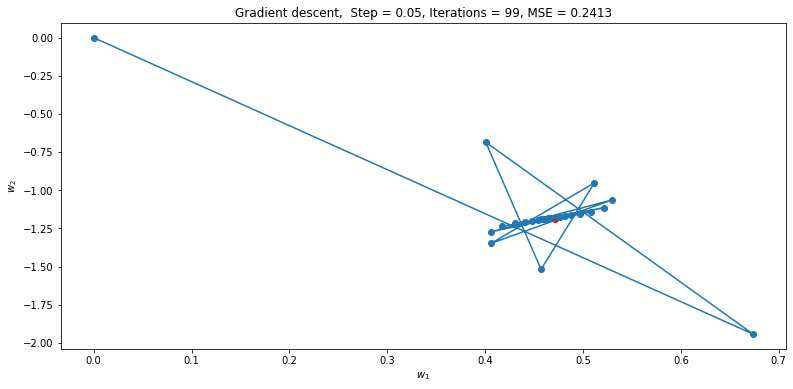

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 
# Шаг eta =0.05
# В случае использования градиентного спуска функционал ошибки составляет 0.2413
# Количество итераций 99
plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

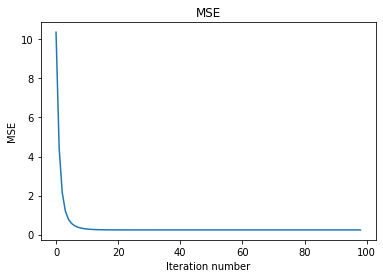

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.05
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Шаг eta = 0.05 оказался большим, что показывает "перепрыгивание" на графике,  поэтому используя метод бинарного поиска, подберем необходимый шаг между 0.01 и 0.05. Ниже приведена таблица подбора шага.


Визуализация изменения весов при шаге eta = 0.025

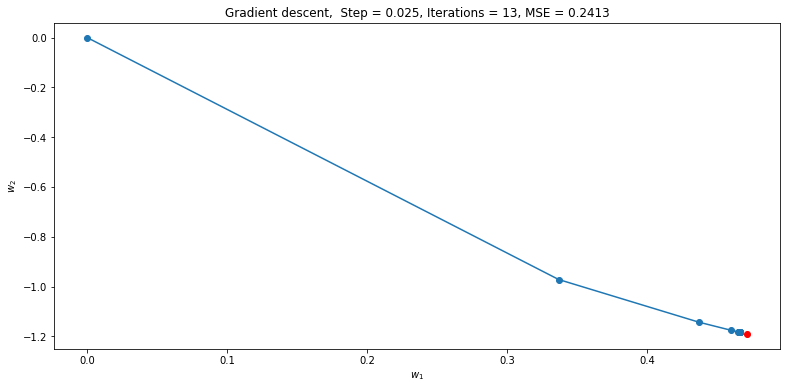

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

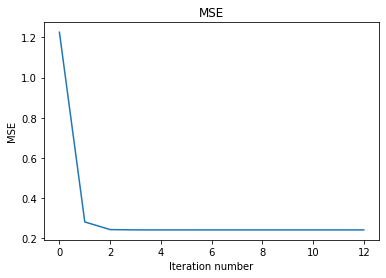

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.025
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.0375

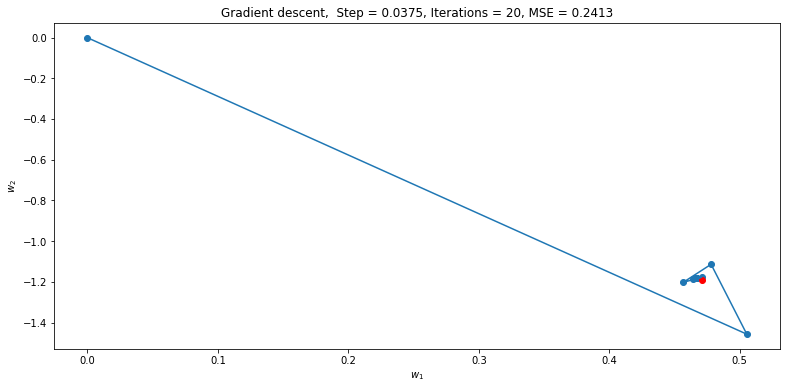

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

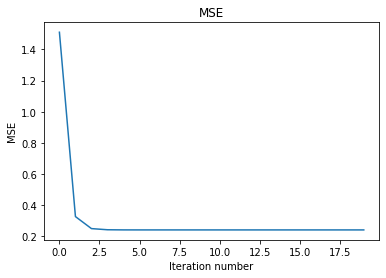

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.0375
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.031

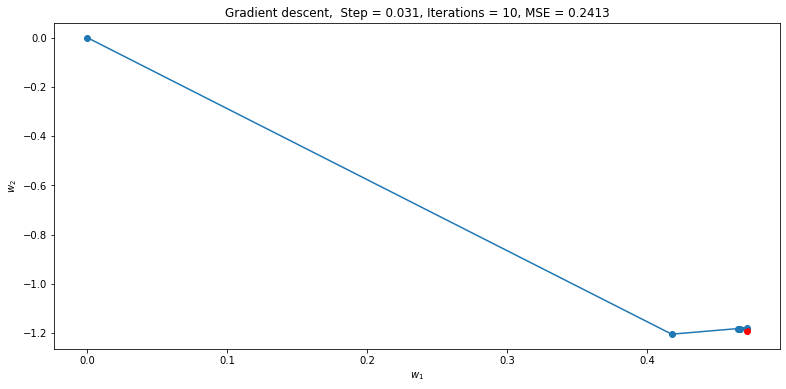

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

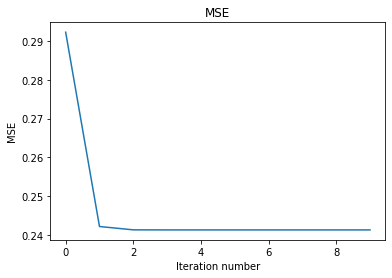

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.031
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.028

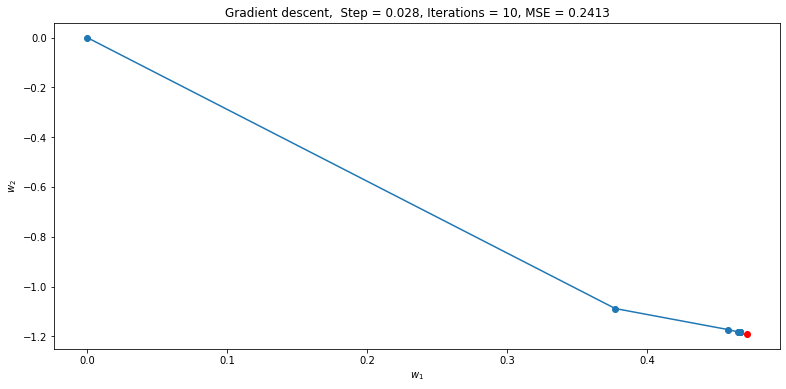

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

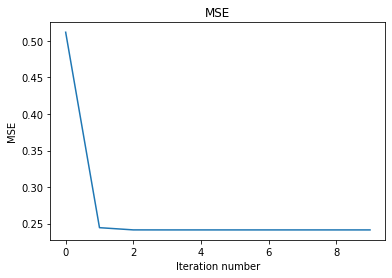

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.031
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.0295




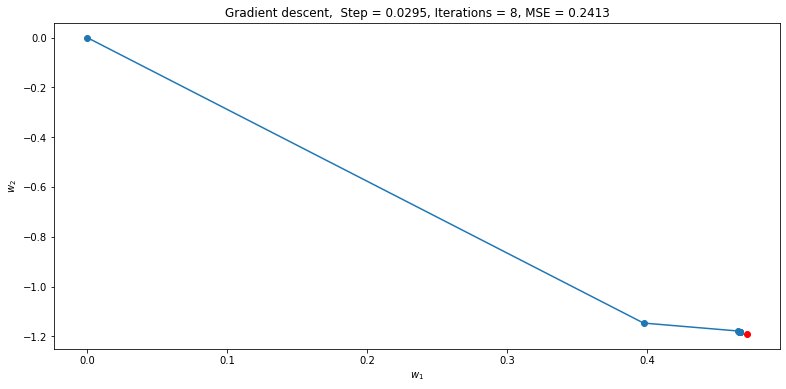

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

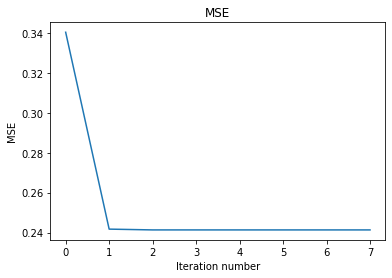

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.0295
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Визуализация изменения весов при шаге eta = 0.03025

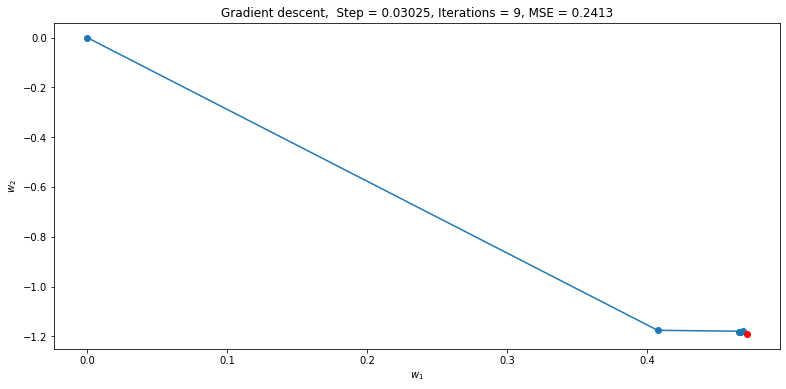

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале) 

plt.figure(figsize=(13, 6))
plt.title(f'Gradient descent,  Step = {eta}, Iterations = {iter_num}, MSE = {round(errors[-1], 4)}')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

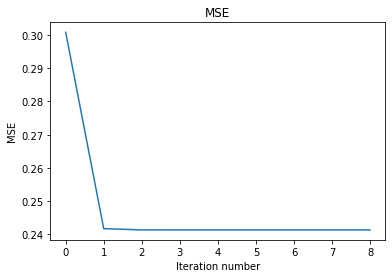

In [ ]:
# Визуализируем изменение функционала ошибки eta = 0.03025
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Таблица хода эксперимента




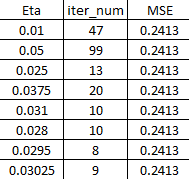





Вывод: в ходе работы с помощью бинарного поиска был найден такой шаг eta = 0.0295 при котором скорость градиентного спуска максимальная ("проходит" за наименьшее кол-во итераций iter_num = 8)